Find the closest two Wetherspoons pubs in the UK using data from https://www.jdwetherspoon.com/pub-search

In [1]:
import math

import pandas as pd
import requests
from sklearn.metrics.pairwise import haversine_distances


Remember to pretend to be a browser

In [2]:
url = "https://www.jdwetherspoon.com/wp-admin/admin-ajax.php"

spoons_response = requests.post(
    url,
    data={"action": "filter_search_pubs_map"},
    headers={
        # "Origin": "https://www.jdwetherspoon.com",
        # "Host": "www.jdwetherspoon.com",
        # "Referer": "https://www.jdwetherspoon.com/pub-search",
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:135.0) Gecko/20100101 Firefox/135.0",
    },
)

spoons_response.raise_for_status()

In [3]:
pubs = spoons_response.json()["searchResults"]
len(pubs)

799

In [4]:
pubs_df = pd.DataFrame(pubs)
pubs_df["latitude"] = pubs_df["latitude"].astype(float)
pubs_df["longitude"] = pubs_df["longitude"].astype(float)
pubs_df.head()

,featured_image,title,distance,full_address,permalink,latitude,longitude,menu_page,pub_with_hotel,pub_hotel_link,opening_times
0,https://www.jdwetherspoon.com/wp-content/uploa...,Abraham Darby,False,"Merry Hill Centre, Merry Hill, Brierley Hill, ...",https://www.jdwetherspoon.com/pubs/abraham-dar...,52.479426,-2.111407,False,,,"{'open_status': 'Open', 'opening_closing_time'..."
1,https://www.jdwetherspoon.com/wp-content/uploa...,An Ruadh-Ghleann,False,"40–44 Main Street, Rutherglen, South Lanarkshi...",https://www.jdwetherspoon.com/pubs/an-ruadh-gh...,55.828222,-4.217484,False,,,"{'open_status': 'Open', 'opening_closing_time'..."
2,https://www.jdwetherspoon.com/wp-content/uploa...,Baxter’s Court,False,"282–284 Mare Street, Hackney, E8 1HE",https://www.jdwetherspoon.com/pubs/baxters-cou...,51.545456,-0.055087,False,,,"{'open_status': 'Open', 'opening_closing_time'..."
3,https://www.jdwetherspoon.com/wp-content/uploa...,Beckett’s Bank,False,"28–30 Park Row, Leeds, West Yorkshire, LS1 5HU",https://www.jdwetherspoon.com/pubs/becketts-ba...,53.798580,-1.547285,False,,,"{'open_status': 'Open', 'opening_closing_time'..."
4,https://www.jdwetherspoon.com/wp-content/uploa...,Cabot Court Hotel,False,"Knightstone Road, Weston-super-Mare, Somerset,...",https://www.jdwetherspoon.com/pubs/cabot-court...,51.350518,-2.982553,False,yes,https://hotels.jdwetherspoon.com/hotels/cabot-...,"{'open_status': 'Open', 'opening_closing_time'..."


Oops, names aren't unique

In [5]:
pubs_df["title"].value_counts().loc[lambda x: x > 1]

title
The Moon Under Water    13
The Red Lion             8
Wetherspoons             6
The Picture House        5
J.J. Moon’s              5
The Standing Order       4
The Wheatsheaf           3
The Last Post            3
The Corn Exchange        3
The George Hotel         3
The Counting House       3
The Society Rooms        3
The Central Bar          3
The Beehive              2
The Crown                2
The George Inn           2
The Crown Inn            2
The Hippodrome           2
The Greyhound            2
The Cross Keys           2
The Bridge House         2
The George               2
The Glass House          2
The Regal                2
The Sawyer’s Arms        2
The Moon on the Hill     2
The Golden Lion          2
The Star                 2
The Union Rooms          2
The Bear                 2
The Wheatsheaf Inn       2
The White House          2
The White Swan           2
The William Morris       2
The Penny Black          2
Name: count, dtype: int64

Pubs ideally would have a unique name

In [6]:
pubs_df["name"] = pubs_df["title"] + " - " + pubs_df["full_address"]
pubs_df.head()

,featured_image,title,distance,full_address,permalink,latitude,longitude,menu_page,pub_with_hotel,pub_hotel_link,opening_times,name
0,https://www.jdwetherspoon.com/wp-content/uploa...,Abraham Darby,False,"Merry Hill Centre, Merry Hill, Brierley Hill, ...",https://www.jdwetherspoon.com/pubs/abraham-dar...,52.479426,-2.111407,False,,,"{'open_status': 'Open', 'opening_closing_time'...","Abraham Darby - Merry Hill Centre, Merry Hill,..."
1,https://www.jdwetherspoon.com/wp-content/uploa...,An Ruadh-Ghleann,False,"40–44 Main Street, Rutherglen, South Lanarkshi...",https://www.jdwetherspoon.com/pubs/an-ruadh-gh...,55.828222,-4.217484,False,,,"{'open_status': 'Open', 'opening_closing_time'...","An Ruadh-Ghleann - 40–44 Main Street, Ruthergl..."
2,https://www.jdwetherspoon.com/wp-content/uploa...,Baxter’s Court,False,"282–284 Mare Street, Hackney, E8 1HE",https://www.jdwetherspoon.com/pubs/baxters-cou...,51.545456,-0.055087,False,,,"{'open_status': 'Open', 'opening_closing_time'...","Baxter’s Court - 282–284 Mare Street, Hackney,..."
3,https://www.jdwetherspoon.com/wp-content/uploa...,Beckett’s Bank,False,"28–30 Park Row, Leeds, West Yorkshire, LS1 5HU",https://www.jdwetherspoon.com/pubs/becketts-ba...,53.798580,-1.547285,False,,,"{'open_status': 'Open', 'opening_closing_time'...","Beckett’s Bank - 28–30 Park Row, Leeds, West Y..."
4,https://www.jdwetherspoon.com/wp-content/uploa...,Cabot Court Hotel,False,"Knightstone Road, Weston-super-Mare, Somerset,...",https://www.jdwetherspoon.com/pubs/cabot-court...,51.350518,-2.982553,False,yes,https://hotels.jdwetherspoon.com/hotels/cabot-...,"{'open_status': 'Open', 'opening_closing_time'...","Cabot Court Hotel - Knightstone Road, Weston-s..."


Convert lat-longs to radians for scikit-learn to calculate distances properly

In [7]:
pubs_df["latitude_radians"] = pubs_df["latitude"].apply(math.radians)
pubs_df["longitude_radians"] = pubs_df["longitude"].apply(math.radians)

pubs_df.head()

,featured_image,title,distance,full_address,permalink,latitude,longitude,menu_page,pub_with_hotel,pub_hotel_link,opening_times,name,latitude_radians,longitude_radians
0,https://www.jdwetherspoon.com/wp-content/uploa...,Abraham Darby,False,"Merry Hill Centre, Merry Hill, Brierley Hill, ...",https://www.jdwetherspoon.com/pubs/abraham-dar...,52.479426,-2.111407,False,,,"{'open_status': 'Open', 'opening_closing_time'...","Abraham Darby - Merry Hill Centre, Merry Hill,...",0.915939,-0.036851
1,https://www.jdwetherspoon.com/wp-content/uploa...,An Ruadh-Ghleann,False,"40–44 Main Street, Rutherglen, South Lanarkshi...",https://www.jdwetherspoon.com/pubs/an-ruadh-gh...,55.828222,-4.217484,False,,,"{'open_status': 'Open', 'opening_closing_time'...","An Ruadh-Ghleann - 40–44 Main Street, Ruthergl...",0.974386,-0.073609
2,https://www.jdwetherspoon.com/wp-content/uploa...,Baxter’s Court,False,"282–284 Mare Street, Hackney, E8 1HE",https://www.jdwetherspoon.com/pubs/baxters-cou...,51.545456,-0.055087,False,,,"{'open_status': 'Open', 'opening_closing_time'...","Baxter’s Court - 282–284 Mare Street, Hackney,...",0.899638,-0.000961
3,https://www.jdwetherspoon.com/wp-content/uploa...,Beckett’s Bank,False,"28–30 Park Row, Leeds, West Yorkshire, LS1 5HU",https://www.jdwetherspoon.com/pubs/becketts-ba...,53.798580,-1.547285,False,,,"{'open_status': 'Open', 'opening_closing_time'...","Beckett’s Bank - 28–30 Park Row, Leeds, West Y...",0.938962,-0.027005
4,https://www.jdwetherspoon.com/wp-content/uploa...,Cabot Court Hotel,False,"Knightstone Road, Weston-super-Mare, Somerset,...",https://www.jdwetherspoon.com/pubs/cabot-court...,51.350518,-2.982553,False,yes,https://hotels.jdwetherspoon.com/hotels/cabot-...,"{'open_status': 'Open', 'opening_closing_time'...","Cabot Court Hotel - Knightstone Road, Weston-s...",0.896236,-0.052055


Calculate the distance matrix using scikit-learn

In [8]:
latlongs_radians = pubs_df[["latitude_radians", "longitude_radians"]].values

distance_matrix = pd.DataFrame(
    haversine_distances(latlongs_radians) * 6371,  # multiply to get units in km
    index=pubs_df["name"],
    columns=pubs_df["name"],
)
distance_matrix

name,"Abraham Darby - Merry Hill Centre, Merry Hill, Brierley Hill, West Midlands, DY5 1QX","An Ruadh-Ghleann - 40–44 Main Street, Rutherglen, South Lanarkshire, G73 2HY","Baxter’s Court - 282–284 Mare Street, Hackney, E8 1HE","Beckett’s Bank - 28–30 Park Row, Leeds, West Yorkshire, LS1 5HU","Cabot Court Hotel - Knightstone Road, Weston-super-Mare, Somerset, BS23 2AH","Captain Ridley’s Shooting Party - 183–185 Queensway, Bletchley, Milton Keynes, Buckinghamshire, MK2 2ED","Castle in the Air - Chill Factore, 7 Trafford Way, Manchester, M41 7JA","Charles Henry Roe - 39/41 Austhorpe Road, Cross Gates, Leeds, West Yorkshire, LS15 8BA","Cornfield Garage - 21–23 Cornfield Road, Eastbourne, East Sussex, BN21 4QD","George Hotel - Load Street, Bewdley, Worcestershire, DY12 2AW",...,"Wetherspoons - NEC, Birmingham, West Midlands, B40 1NT","Wetherspoons - Leeds City station, North Concourse, Leeds, West Yorkshire, LS1 4DY","Wetherspoons - Victoria station concourse, (1st floor above WHSmith), Victoria, Westminster, SW1V 1JT","Wetherspoons - 49 Piccadilly, Manchester, M1 2AP","Wetherspoons - 201 Midsummer Boulevard, Bouverie Square, Milton Keynes, Buckinghamshire, MK9 1EA","Woodrow Wilson - 48 Botchergate, Carlisle, Cumbria, CA1 1QS","Y Dic Penderyn - 102–103 High Street, Merthyr Tydfil, CF47 8AP","Yr Hen Dderwen - 47–48 King Street, Carmarthen, Carmarthenshire, SA31 1BH","Yr Hen Orsaf - Alexandra Road, Aberystwyth, Ceredigion, SY23 1LN","Yr Ieuan Ap Iago - 6 High Street, Aberdare, Rhondda Cynon Taff, CF44 7AA"
name,,,,,,,,,,,,,,,,,,,,,
"Abraham Darby - Merry Hill Centre, Merry Hill, Brierley Hill, West Midlands, DY5 1QX",0.000000,396.773233,174.892363,151.431458,139.021187,108.570014,111.262621,154.159523,252.139870,18.005691,...,26.863816,150.951679,173.534413,111.702140,103.825081,273.496752,118.773425,164.826680,133.734699,124.829575
"An Ruadh-Ghleann - 40–44 Main Street, Rutherglen, South Lanarkshire, G73 2HY",396.773233,0.000000,549.238234,283.164177,504.503396,483.475185,288.248599,286.317490,636.992835,403.388183,...,408.966331,283.549277,551.279048,290.434424,478.056149,132.211753,457.097144,441.611180,379.736987,460.410300
"Baxter’s Court - 282–284 Mare Street, Hackney, E8 1HE",174.892363,549.238234,0.000000,269.968222,204.012496,68.120388,264.717033,268.427977,89.677940,180.294867,...,152.140954,269.522429,8.324872,260.921481,73.451700,418.276028,230.359878,294.878978,292.165265,234.793849
"Beckett’s Bank - 28–30 Park Row, Leeds, West Yorkshire, LS1 5HU",151.431458,283.164177,269.968222,0.000000,288.959222,207.885388,64.997575,6.661165,359.296412,166.315697,...,149.951009,0.491101,273.027652,57.455326,202.672243,150.954413,259.190624,284.448373,228.721814,264.790852
"Cabot Court Hotel - Knightstone Road, Weston-super-Mare, Somerset, BS23 2AH",139.021187,504.503396,204.012496,288.959222,0.000000,171.321445,239.268159,292.206526,237.330449,122.861061,...,150.297137,288.491870,197.434691,242.282581,170.706335,393.671679,51.918803,107.300042,140.279222,51.491547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Woodrow Wilson - 48 Botchergate, Carlisle, Cumbria, CA1 1QS",273.496752,132.211753,418.276028,150.954413,393.671679,353.423573,162.413237,154.139601,506.681569,282.577675,...,282.502787,151.340722,420.638477,163.135021,348.038430,0.000000,350.786582,349.416627,285.640223,355.033451
"Y Dic Penderyn - 102–103 High Street, Merthyr Tydfil, CF47 8AP",118.773425,457.097144,230.359878,259.190624,51.918803,184.132982,203.341287,263.300413,277.147656,100.797566,...,137.996350,258.752344,224.977723,207.659596,182.017171,350.786582,0.000000,64.886915,88.363177,6.073380
"Yr Hen Dderwen - 47–48 King Street, Carmarthen, Carmarthenshire, SA31 1BH",164.826680,441.611180,294.878978,284.448373,107.300042,245.853213,222.019129,289.594516,341.150970,147.579402,...,188.597656,284.069245,289.648459,228.227955,243.257378,349.416627,64.886915,0.000000,63.784922,61.206022


Now use this distance matrix to find the shortest distance between two Wetherspoons

One option: remove zeros and find the closest pub for each pub, then sort the list

In [9]:
(
    distance_matrix.replace({0: 10000})
    .agg(["min", "idxmin"], axis=1)
    .drop_duplicates(subset=["min"])
    .sort_values("min")
    .head(50)
)

,min,idxmin
name,,
"Sheffield Water Works Company - Cambridge House, 2–12 Division Street, Sheffield, South Yorkshire, S1 4GF",0.051359,The Benjamin Huntsman - 12–18 Cambridge Street...
"The Atrium - Birmingham NEC, Birmingham, West Midlands, B40 1NT",0.096809,"Wetherspoons - NEC, Birmingham, West Midlands,..."
"The William Rufus - 10–16 Botchergate, Carlisle, Cumbria, CA1 1QS",0.099704,"Woodrow Wilson - 48 Botchergate, Carlisle, Cum..."
"Montgomery’s Tower - Lower Claremont Bank, Shrewsbury, Shropshire, SY1 1RT",0.105896,"The Shrewsbury Hotel - Bridge Place, Shrewsbur..."
"The Willow Walk - 25 Wilton Road, Victoria, Westminster, SW1V 1LW",0.133431,"Wetherspoons - Victoria station concourse, (1s..."
"The Great Western - 64 St Mary Street, Cardiff, CF10 1FA",0.13718,"The Prince of Wales - 81–83 St Mary Street, Ca..."
"The Cuthbert Brodrick - 99 Portland Crescent, Leeds, West Yorkshire, LS2 3AD",0.14753,"The Hedley Verity - 43a Woodhouse Lane, Leeds,..."
"The Albert and The Lion - Bank Hey Street, Blackpool, Lancashire, FY1 4RU",0.148727,"The Layton Rakes - 17–25 Market Street, Blackp..."
"The Joseph Else - 11–12 South Parade, Market Square, Nottingham, Nottinghamshire, NG1 2JS",0.171955,"The Roebuck Inn - 9–11 St James’s Street, Nott..."


Looks like it's the Benjamin Huntsman and the Sheffield Water Works Company (around the corner from each other)

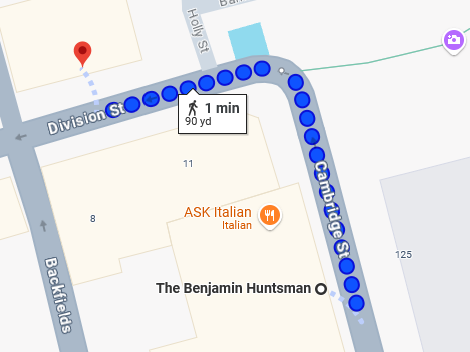

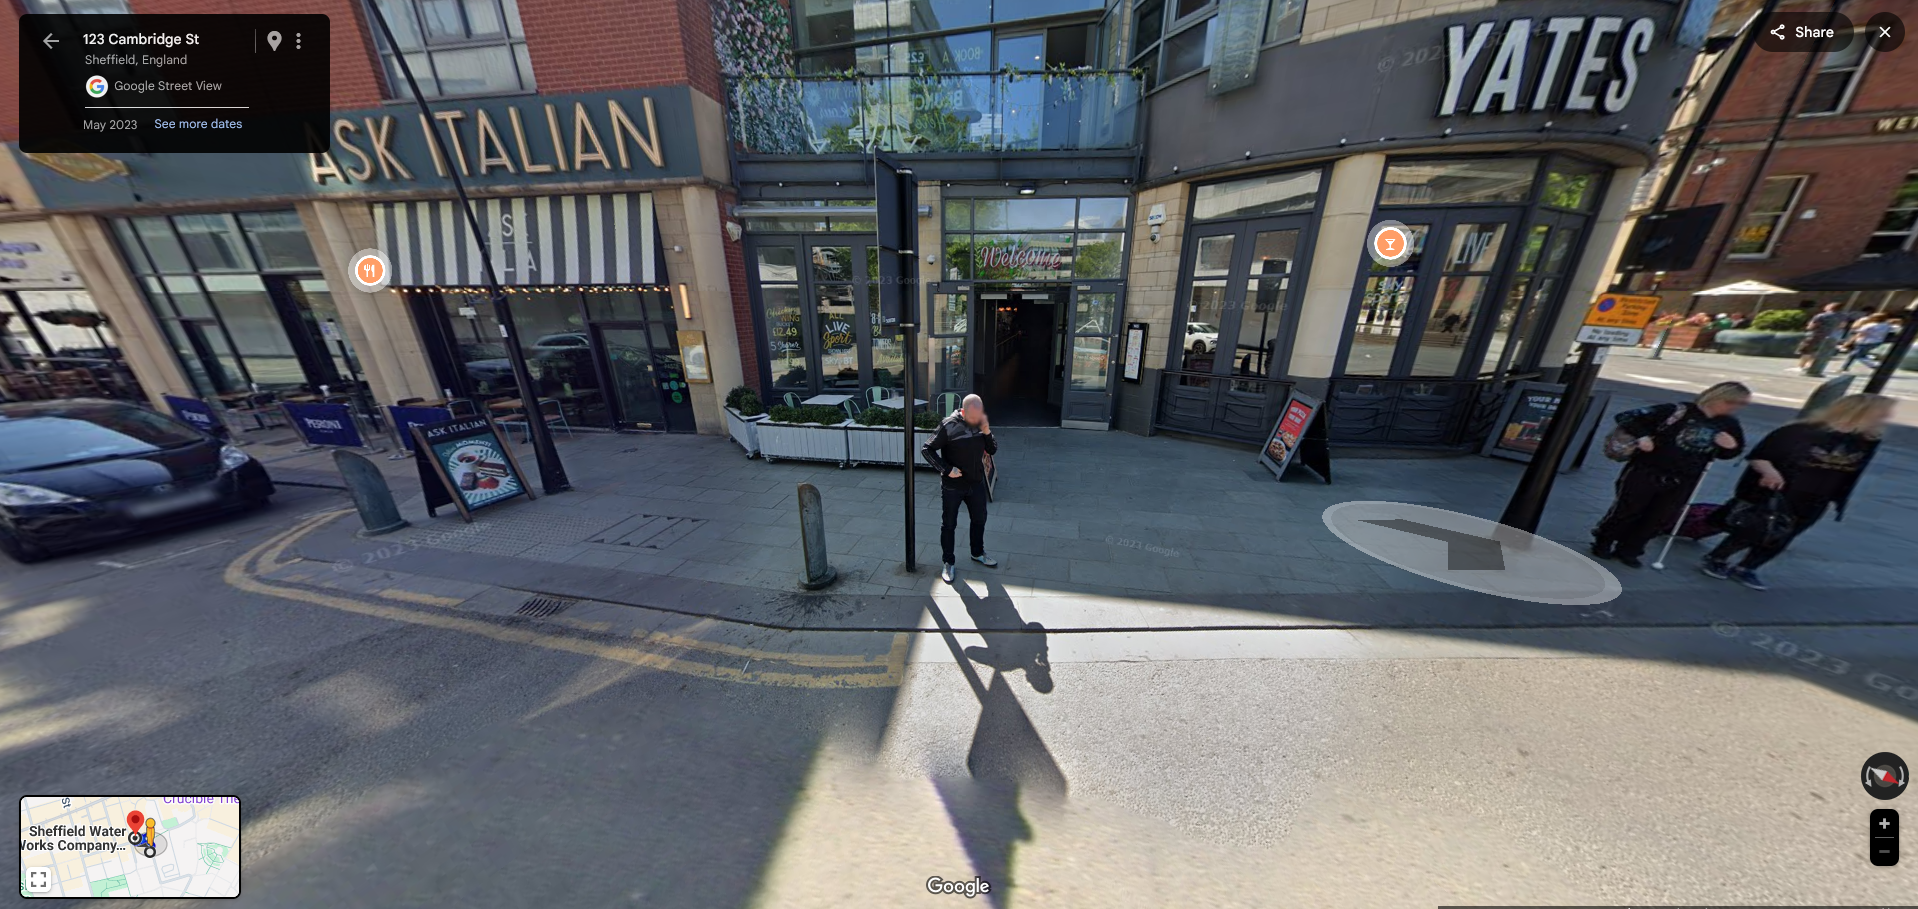